# Assignment 1 - 3 weeks (each exercise is worth 2 points)
## Exercise 1 - Seismic gather with reflectors and its FK spectrum
Create a seismic gather for a flat layer model, with your choice for the maximum offset, trace interval and shot location. \
Use dt=0.004s and layers with the following velocities/depth values: \
 - velocities(rms)=[1500, 2000, 2500]\
 - depth=[200,500,1070]\
 - reflectivity=[1,-0.5,0.4]\

HINTS:
 * Set different layer depths in a list, and loop through its elements.
 * Use a inner loop for offset or comprehension list
 
Assume the given velocities are Vrms and use the reflectivity coefficients given. \
Assume your wavelet is full-band (spike).\
Then plot its FK amplitude spectrum (average for all traces) and its FK spectrum.\
The fk_spectrum function is given, you can use first a linear event to test that it works.

Question: do you observe aliasing? If so, what could you do to eliminate it? (see question 3)

In [1]:
import numpy as np
def fk_spectrum(d,dt,dx,freq_cut=0):
    # Author: Hongliang Zhang
    if (freq_cut==0):
        freq_cut=int(1/(2*dt)-1)
    
    nt,nx=d.shape
    nf=int(2 ** (np.ceil(np.log2(nt)) + 1))
    nkx=int(2 ** (np.ceil(np.log2(nx + 2)) + 1))
    
    d_fk=np.real(np.fft.fftshift(np.fft.fft2(d,(nf,nkx))))
    d_fk=d_fk / np.max(d_fk)
    
    nf2=nf / 2 + 2
    ifreq=np.arange(1,nf+1)
    ifreq2=ifreq - 1 - nf*np.floor(ifreq/nf2)
    freq=ifreq2 / nf / dt
    
    nkx2=nkx / 2 + 2
    ikx=np.arange(1,nkx+1)
    ikx2=ikx - 1 - nkx*np.floor(ikx / nkx2)
    kx2=ikx2 / nkx / dx
    kx=np.hstack((kx2[int(nkx/2+2):nkx],kx2[0:int(nkx/2+2)]))
    
    if (freq_cut > 0):
        dfreq=1 / nf / dt
        ifreq_cut=np.int(round(freq_cut / dfreq) + 1)
        freq=freq[range(ifreq_cut)]
        d_fk=d_fk[np.arange(int(nf/2),int(nf/2+ifreq_cut)),:]
        
    return d_fk,freq,kx

## Exercise 2: Data fitting
### Create a data fitting example
Use Least Squares to fit a straight line to the following data. \
 - 1)   Use scikitlearn (LinearRegression - fit - predict see Practice 1), Print the slope and intercept values from the model
 - 2)  Use np.linalg package to solve the problem with Numpy matrices ( $ { x=(A^T A)^{-1}*A^T} y $). 

Text(0, 0.5, 'y')

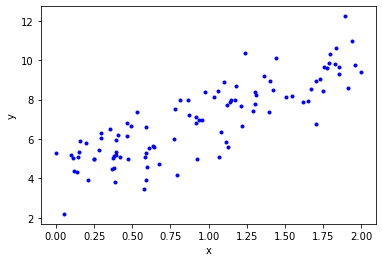

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
plt.plot(x,y,'b.');
plt.xlabel('x')
plt.ylabel('y')

Part 1: For comparison, here solve the problem using sklearn:

Part 2: Now solve using matrices and standard LS.

## Exercise 3: 1D convolution
### Part 1: Create a seismic trace using the convolutional model
Create a seismic trace using an arbitrary synthetic reflectivity function and a Ricker wavelet.\
You can calculate the Ricker wavelet using the original equation or from scipy \
* from scipy import signal
* ricker=signal.ricker(nt,amp)
// create your reflectivity
* trace =signal.convolve(ricker, reflectivity, mode='same')

For the reflectivity function, you can invent a vector with amplitudes for different depths.
Example:
```
R=[0.1,-0.05,0.07,0]  # coeff
z=[200,500,1070,1600] # depth
```


### Part 2: Create a seismic gather
can you do this for every trace on the original gather you created before?

## Exercise 4 - 1D Deconvolution
#### Removing the wavelet
take the example from exercise 3 (one trace) after convolution, and apply deconvolution.\
You can do this with any tool you find but the easiest way is to do it in the frequency domain (Least squares). \
if $ y(t) = w(t) \ast r(t) $ \
$ { R(\omega)=\frac{W(\omega)^T Y(\omega) }{W(\omega)^T*W(\omega) + \epsilon}} $


## Exercise 5: Manipulating images
### Creating velocity models from general images
Take a picture in any format (png, jpg, etc) and resize it to the following size: (n2=1151, n1=376).\
For example, let us say we want to use this picture as a velocity model for testing geophysical algorithms for imaging and inversion. \
The dimension 1 will be the depth direction, and the dimension 2 will be the horizontal distance. \
These are the same dimensions we normally use for the Marmousi model, commonly used for testing FWI and imaging.\
If it is a color image (for example, RGB), select one of the channels. \
Take the pixel values of the image (integers between 0 and 255), convert them to floats and then to seismic velocities in m/sec \
Typical ranges will be between 1500 m/s (water) to 4500m/s (salt). \
Then save this image as a binary file that we can read with standard seismic programs. \
We will take later the best velocity model and perform modeling, migration and inversion using a seismic software.


## OPTIONAL: Exercise 6: 2D convolution (bonus points)
### Writting a 2D convolution program in python.

Convolutions in 2D (`conv2d`) are used in convolutional neural networks (in reality they use correlation2D which is similar but without inverting the filter).\
The figure below (taken from RAschka and Mirjalili, 2019), shows how the conv2d acts on an image to get the feature maps (or attributes of an image).


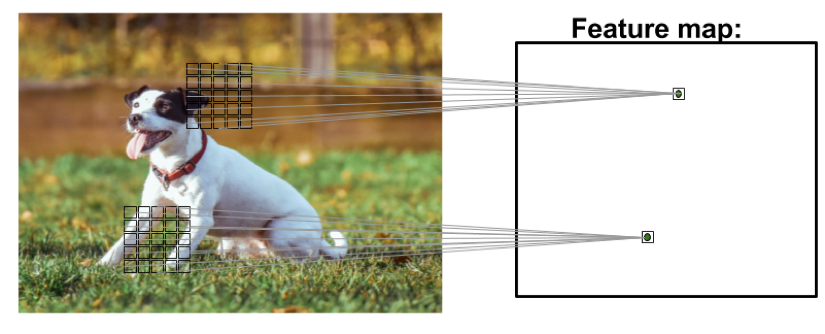

In [3]:
from IPython.display import Image
Image(filename='../images/15_01.png', width=700)

Write a 2D convolution program from scratch and compare with the results of scipy.signal.convolve2d \
For example, use the following two matrices:
```
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]] \
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
```

In [7]:
import scipy.signal
import numpy as np

def conv2d(X, W, p=(0, 0), s=(1, 1)):



    return np.zeros(np.array(X).shape)



X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('SciPy Results:\n',
    scipy.signal.convolve2d(X, W, mode='same'))

print('My Conv2d Implementation:\n',
    conv2d(X, W, p=(1, 1), s=(1, 1)))




SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]
My Conv2d Implementation:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
